<a href="https://colab.research.google.com/github/nahid1602/Deep_Learning_Practice/blob/main/CPU_practice_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

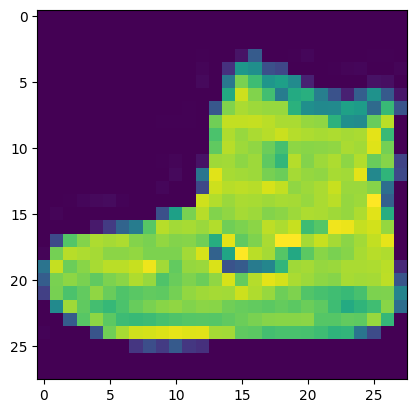

In [5]:
plt.imshow(train_images[0])

In [6]:
class_names[train_labels[0]]

'Ankle boot'

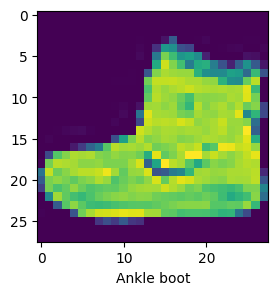

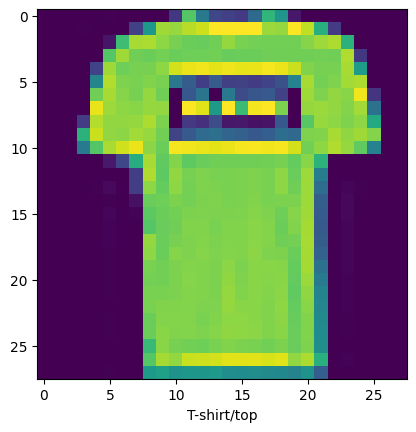

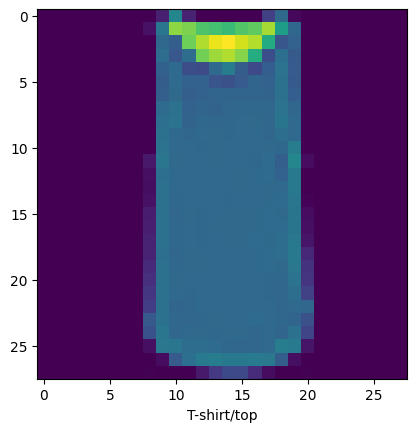

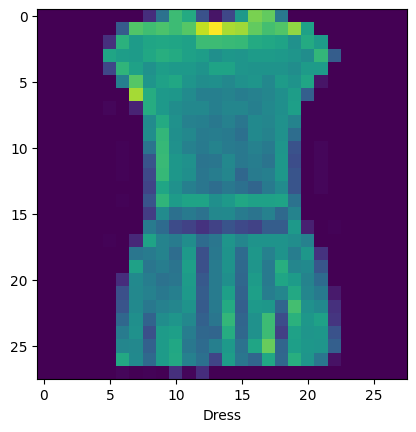

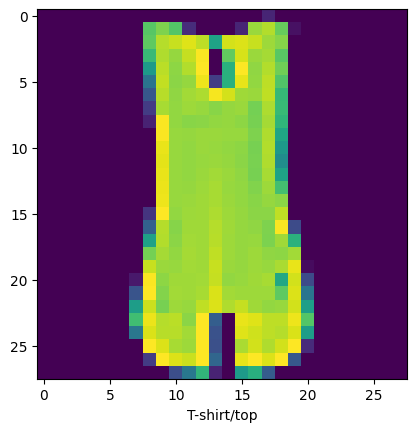

In [7]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [8]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [9]:
def get_model(hidden_layers=1):
    layers = []
    layers.append(keras.layers.Flatten(input_shape=(28, 28)))

    # Create hidden layers that are equal to hidden_layers argument in this function
    for _ in range(hidden_layers):
      layers.append(keras.layers.Dense(128, activation='relu'))
    # Create output
    layers.append(keras.layers.Dense(10, activation='sigmoid'))
    model = keras.Sequential(layers)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [10]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7726 - loss: 0.6515
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8636 - loss: 0.3833
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8766 - loss: 0.3367
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8841 - loss: 0.3156
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8913 - loss: 0.2908


In [11]:
model_pred= model.predict(test_images_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [12]:
class_names[np.argmax(model_pred[2])]

'Trouser'

In [13]:
class_names[test_labels[2]] #The prediction matches the test labels

'Trouser'

In [14]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(5)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7658 - loss: 0.6537
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8587 - loss: 0.3882
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8716 - loss: 0.3461
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8820 - loss: 0.3188
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8903 - loss: 0.2981
45.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [16]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(5)
    gpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7572 - loss: 0.6602
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8574 - loss: 0.3900
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8727 - loss: 0.3439
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8818 - loss: 0.3210
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8852 - loss: 0.3044
38.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
